# Introduction to A/B Testing

In [ ]:
# Imports
import numpy as np
import pandas as pd

from scipy.special import binom
from scipy.stats import chi2_contingency, mannwhitneyu, norm, t, ttest_ind

import matplotlib.pyplot as plt

## Discrete Metrics

In [ ]:
# Simulate click data

np.random.seed(42)

# Simulate clicks for version A (15 users, 60% chance of clicking)
x = np.random.binomial(n=1, p=0.6, size=15)

# Simulate clicks for version B (19 users, 40% chance of clicking)
y = np.random.binomial(n=1, p=0.4, size=19)

# Count clicks and no-clicks
_, (a, b) = np.unique(x, return_counts = True)
_, (c, d) = np.unique(y, return_counts = True)

# Create a contingency table
df = pd.DataFrame(data = [[a, b], [c, d]],
                  index = ['click', 'no click'],
                  columns = ['A', 'B']
                  )

m = df.values

print("- Observations:")
print(f"  - Version A: = {x}")
print(f"  - Version B: = {y}")
print("")
print("- Contingency table:")
display(df)

- Observations:
  - Version A: = [1 0 0 1 1 1 1 0 0 0 1 0 0 1 1]
  - Version B: = [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1]

- Contingency table:


,A,B
click,7,8
no click,15,4


In [ ]:
# Perform a Fisher's exact test (David's way)

from scipy.stats import fisher_exact

# Perform the test using scipy
odds_ratio, p_value = fisher_exact(m)

# Display values
print(f"Odds ratio: {odds_ratio}.")
print(f"p-value: {p_value}.")


Odds ratio: 0.23333333333333334.
p-value: 0.07516241879060467.


p_value > alpha : we can't reject the null hypothesis.


- Fisher's exact test: p-val = 7.5%


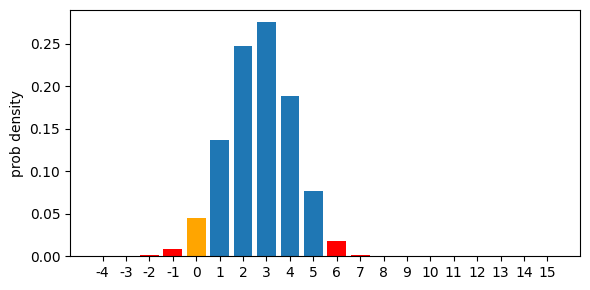

In [ ]:
# Course's way

def hypergeom(k, K, n, N):
    """Probability mass funciton of the hypergeometric distribution."""
    return binom(K, k) * binom(N-K, n-k) / binom(N, n)


def fisher_prob(m):
    """Probability of a given observed contingency table according to Fisher's exact test."""
    ((a, b), (c ,d)) = m
    k = a
    K = a+b
    n = a+c
    N = a+b+c+d
    return hypergeom(k, K, n, N)

def fisher_probs_histogram(m):
    """Computes prob mass function histogram accroding to Fisher's exact test."""
    neg_val = -min(m[0,0], m[1,1])
    pos_val = min(m[1,0], m[1,0])
    probs = []
    for k in range(neg_val, pos_val+1):
        m1 = m + np.array([[1, -1], [-1, 1]]) * k
        probs.append(fisher_prob(m1))
    return probs

bars_h = np.array(fisher_probs_histogram(m))

f, ax = plt.subplots(figsize=(6, 3))
ii = np.arange(len(bars_h))
ax.bar(ii, bars_h)
idxs = bars_h <= fisher_prob(m)
ax.bar(ii[idxs], bars_h[idxs], color='r')
ax.set_ylabel("prob density")
p_val = bars_h[idxs].sum()
neg_val = -min(m[0,0], m[1,1])
pos_val = min(m[1,0], m[1,0])
ax.bar(ii[-neg_val], bars_h[-neg_val], color='orange')

ax.set_xticks(ii)
ax.set_xticklabels(np.arange(neg_val, pos_val+1))
f.tight_layout()
print(f"- Fisher's exact test: p-val = {100*p_val:.1f}%")

In [ ]:
# Discrete metric + Large sample size: Pearson

# Perform the test
chi2_val, p_val = chi2_contingency(m, correction=False)[:2]

print("- Pearson's chi-squared t-test:")
print(f"   - χ2 value: {chi2_val:.3f}")
print(f"   - p-value: {p_val*100:.1f}%")

- Pearson's chi-squared t-test:
   - χ2 value: 3.825
   - p-value: 5.1%


## Continuous Metrics

- Observations:
  - Version A: = [200 150 250 350 150 150 350 250 150 250 150 150 200   0   0 100  50]
  - Version B: = [300 150 150 400 250 250 150 200 250 150 300 200 250 200]

- Distribution plot:


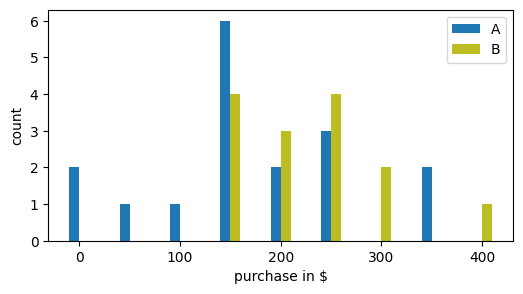

In [ ]:
# Simulate the values

np.random.seed(42)

n_x, n_y = 17, 14

d1 = norm(loc=200, scale=100)
d2 = norm(loc=280, scale=90)

disc = 50
x = (d1.rvs(size=n_x) / disc).astype(int) * disc
y = (d2.rvs(size=n_y) / disc).astype(int) * disc


print("- Observations:")
print(f"  - Version A: = {x}")
print(f"  - Version B: = {y}")
print("")
print(f"- Distribution plot:")
f, ax = plt.subplots(figsize=(6, 3))
for i, (x_, l_, c_) in enumerate(zip([x, y], ["A", "B"], ["tab:blue", "tab:olive"])):
    v, c = np.unique(x_, return_counts=True)
    ax.bar(v-5+10*i, c, width=10, label=l_, color=c_)

ax.set_xlabel("purchase in $")
ax.set_ylabel("count")
ax.legend();

In [ ]:
# Define a function to plot the probability density functions (pdf)
def plot_pval(distribution, t_val, xlims=(-5, 5), ylims=(0, 0.5)):
    xxx = np.linspace(*xlims, 1000)
    f, ax = plt.subplots(figsize=(4,3))
    ax.plot(xxx, distribution.pdf(xxx))
    ax.set_ylim(ylims)
    ax.vlines(t_val, 0, stat_distrib.pdf(t_val), color='orange')
    ax.plot(t_val, stat_distrib.pdf(t_val), 'o', color='orange')
    xp = xxx <= t_val
    ax.fill_between(xxx[xp], xxx[xp] * 0, stat_distrib.pdf(xxx[xp]), color='r')
    xp = xxx >= -t_val
    ax.fill_between(xxx[xp], xxx[xp] * 0, stat_distrib.pdf(xxx[xp]), color='r')
    ax.set_ylabel("prob density")
    f.tight_layout()
    return f, ax

- Z-test:
   - z value: -1.697
   - p-value: 9.0%


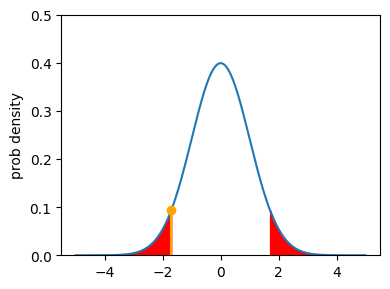

In [ ]:
# Perfom a Z test

# Known standard deviations
s_x = 100
s_y = 90

# Z value
z_val = (x.mean() - y.mean()) / np.sqrt(s_x**2/n_x + s_y**2/n_y)

# Test statistic distribution under null hypothesis H0
stat_distrib = norm(loc=0, scale=1)

# p-value
p_val = stat_distrib.cdf(z_val) * 2

print("- Z-test:")
print(f"   - z value: {z_val:.3f}")
print(f"   - p-value: {p_val*100:.1f}%")
plot_pval(stat_distrib, z_val);

- Student's t-test:
   - nu: 29.000
   - t value: -1.789
   - p-value: 8.4%


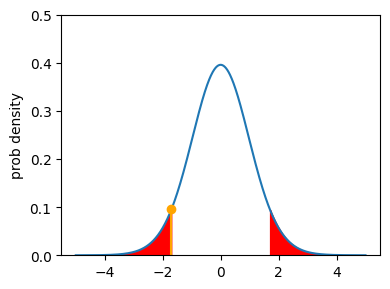

In [ ]:
# Perform a Student’s t-test

# Sample variances (w. Bessel correction)
s_x = np.sqrt(np.var(x, ddof=1))
s_y = np.sqrt(np.var(y, ddof=1))

# Pooled variance
s_p = np.sqrt(((n_x-1) * s_x**2 +
               (n_y-1) * s_y**2)
              / (n_x + n_y - 2))

# Test statistic distribution under null hypothesis H0
dofs = n_x + n_y - 2
stat_distrib = t(df=dofs, loc=0, scale=1)

# t value
t_val = (x.mean() - y.mean()) / (s_p * np.sqrt(1/n_x + 1/n_y))

# p-value
p_val = stat_distrib.cdf(t_val) * 2

print("- Student's t-test:")
print(f"   - nu: {dofs:.3f}")
print(f"   - t value: {t_val:.3f}")
print(f"   - p-value: {p_val*100:.1f}%")
plot_pval(stat_distrib, z_val);

- Welch' t-test:
   - nu: 28.505
   - t value: -1.848
   - p-value: 7.5%


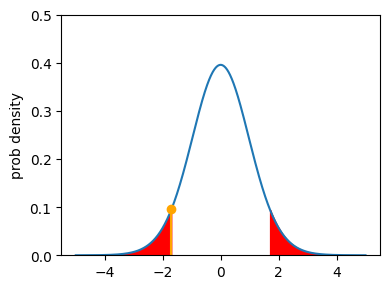

In [ ]:
# Perform a Welsh's t test

# Sample variances (w. Bessel correction)
s_x = np.sqrt(np.var(x, ddof=1))
s_y = np.sqrt(np.var(y, ddof=1))

# Denominator (not a pooled variance!)
s_d = np.sqrt(s_x**2/n_x + s_y**2/n_y)


# Test statistic distribution under null hypothesis H0
dofs = s_d**4 / ((s_x**2/n_x)**2/(n_x-1) +
                 (s_y**2/n_y)**2/(n_y-1))
stat_distrib = t(df=dofs, loc=0, scale=1)

# t value
t_val = (x.mean() - y.mean()) / s_d

# p-value
p_val = stat_distrib.cdf(t_val) * 2

print("- Welch' t-test:")
print(f"   - nu: {dofs:.3f}")
print(f"   - t value: {t_val:.3f}")
print(f"   - p-value: {p_val*100:.1f}%")
plot_pval(stat_distrib, z_val);


In [ ]:
# Perform Mann-Whitney U test

mwu = mannwhitneyu(x, y, use_continuity=False, alternative="two-sided")

print("- Mann-Whitney U test:")
print(f"   - U value: {mwu.statistic:.3f}")
print(f"   - p-value: {mwu.pvalue*100:.1f}%")

- Mann-Whitney U test:
   - U value: 76.000
   - p-value: 8.0%


# More

## MVT



In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv('mvt_data.csv')

# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df[['button_color', 'header_version', 'converted']], drop_first=True)

# Logistic Regression
X = df_dummies.drop('converted', axis=1)
y = df_dummies['converted']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.Logit(y, X)
result = model.fit()
print(result.summary())